In [1]:
import  numpy as np
import pandas as pd
df=pd.read_csv("Student_Marks.csv")
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [2]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [4]:
df.shape

(100, 3)

In [5]:
df.dtypes

number_courses      int64
time_study        float64
Marks             float64
dtype: object

In [6]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [7]:
x=df.iloc[:,:-1]
x

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [8]:
y=df.iloc[:,-1]
y

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64

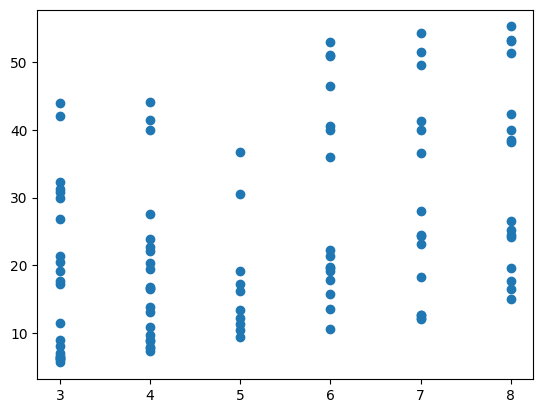

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df["number_courses"],y)

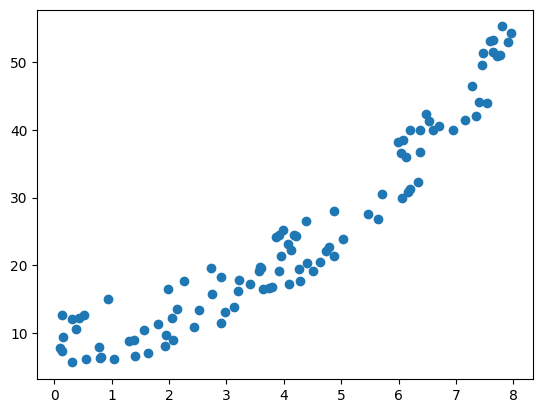

In [10]:
plt.scatter(df["time_study"],y)

<Axes: xlabel='number_courses', ylabel='Marks'>

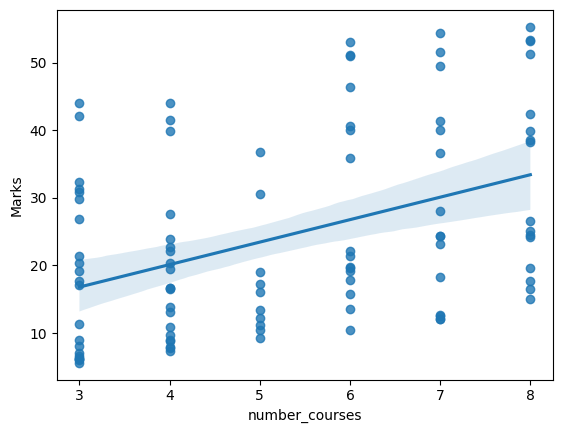

In [11]:
import seaborn as sns
sns.regplot(x=df["number_courses"],y=y)

<Axes: xlabel='time_study', ylabel='Marks'>

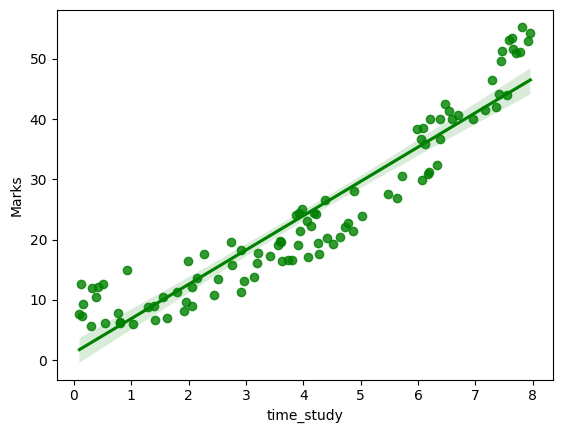

In [12]:
sns.regplot(x=df["time_study"],y=y,color="g")

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,number_courses,time_study
11,7,0.423
47,4,4.779
85,8,6.201
28,5,0.156
93,8,6.471
...,...,...
60,6,0.376
71,5,2.518
14,3,2.908
92,4,5.027


In [14]:
x_test

,number_courses,time_study
83,5,3.197
53,7,6.049
70,4,3.736
45,3,2.061
44,4,1.954
39,6,7.775
22,5,2.051
80,7,7.957
10,3,7.353
0,3,4.508


In [15]:
y_train

11    12.132
47    22.701
85    39.957
28     9.333
93    42.426
       ...  
60    10.522
71    13.416
14    11.397
92    23.916
51    22.184
Name: Marks, Length: 70, dtype: float64

In [16]:
y_test

83    16.106
53    36.653
70    16.606
45     8.924
44     9.742
39    51.142
22    12.209
80    54.321
10    42.036
0     19.202
18    50.986
30    24.172
73     7.014
33    39.965
90    24.394
4     55.299
76    36.746
77    38.278
12    24.318
31     8.100
55    18.238
88    11.253
26    12.647
42    19.771
69    21.400
15    19.466
40     7.336
96     5.609
9     30.862
72    20.398
Name: Marks, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([19.2023582 , 38.09765401, 20.14982671,  9.38493504, 10.72280511,
       45.32451345, 13.13986283, 48.1912327 , 37.38033252, 22.3298968 ,
       44.98594477, 28.44262235,  7.09959647, 39.07686333, 28.22097089,
       49.32278747, 36.03556961, 39.66299991, 28.41141577,  8.65489633,
       21.50778884, 11.82790921,  8.78501278, 23.19058619, 25.07916459,
       22.92185775,  1.12649917,  0.07429642, 31.13797254, 22.99116375])

In [18]:
print(model.predict([[6,4.87]]))

[29.9566696]


c:\Users\SHYAMA S\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
print("slope is",list((zip(x,model.coef_))))

slope is [('number_courses', np.float64(1.9039145719825434)), ('time_study', np.float64(5.290135578059898))]


In [20]:
print("constant is",model.intercept_)

constant is -7.2297781014350875


In [21]:
df1=pd.DataFrame({"actualvalue":y_test,"predicted value":y_pred,"difference":y_test-y_pred})
df1

,actualvalue,predicted value,difference
83,16.106,19.202358,-3.096358
53,36.653,38.097654,-1.444654
70,16.606,20.149827,-3.543827
45,8.924,9.384935,-0.460935
44,9.742,10.722805,-0.980805
39,51.142,45.324513,5.817487
22,12.209,13.139863,-0.930863
80,54.321,48.191233,6.129767
10,42.036,37.380333,4.655667
0,19.202,22.329897,-3.127897


In [22]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

3.0284743686391673

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.16957992141874825

In [24]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

13.104475429070748

In [25]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

3.6200104183649455

In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.9317836937557193